In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
import os
import statsmodels
from statsmodels.tsa.stattools import adfuller
import time
import math 
#read train data file 
root = os.getcwd()
File = '/tempfeature_train_split2018-01-01.csv'
df_train = pd.read_csv(root+File)
#set date as index
df_train=df_train.set_index('Unnamed: 0')
display(df_train)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


,RAY_feature0,RAY_feature1,QQQ_feature0,QQQ_feature1,QQQ_feature2,T10Y3M_feature0,T10Y3M_feature1,CL1_feature0,CL1_feature1,HG1_feature0,...,XAG_feature0,XAG_feature1,VNQ_feature0,VNQ_feature1,EURtoUSD_feature0,EURtoUSD_feature1,EEM_feature0,EEM_feature1,VIX_feature0,VIX_feature1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2006-11-20,0.885324,0.623950,1.459508,0.776773,0.695967,1.682670,0.682430,0.940578,1.529239,0.709452,...,0.818557,1.420594,0.759136,0.762117,1.401735,1.595564,2.366925,0.623210,2.006362,0.722545
2006-11-21,0.964767,0.662617,1.361366,0.838592,0.541879,1.783971,0.709804,1.024910,1.405953,0.722956,...,0.759346,1.496068,0.716507,0.852777,1.373349,1.662168,2.397174,0.631091,2.021739,0.704223
2006-11-22,1.141544,0.779493,1.408920,0.875384,0.565303,1.856760,0.699308,1.046798,1.382187,0.729090,...,0.719490,1.395972,0.757292,0.886103,1.044487,1.326920,2.449411,0.632879,1.980979,0.673374
2006-11-23,1.018305,0.642769,1.496243,0.626023,0.937911,2.689592,1.147392,1.126029,1.336662,0.739020,...,0.808542,1.350528,0.641696,1.059983,1.033326,1.437399,2.454318,0.654184,1.949406,0.659092
2006-11-24,0.873695,0.648454,1.223600,0.629167,0.742482,2.750116,1.268049,1.121907,1.264566,0.693209,...,0.868634,1.395759,0.716777,1.083507,0.908714,1.202280,2.478807,0.658989,1.898560,0.616410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,0.919329,0.990031,1.068843,0.860211,0.595686,1.150398,1.891270,1.897113,0.724838,1.394268,...,0.857448,1.257620,1.088082,0.561691,0.930235,1.254605,1.425323,1.244799,0.840293,1.350324
2017-12-26,0.861703,1.002830,1.081094,0.703996,1.012427,0.251600,1.823043,1.932922,0.763409,1.376117,...,0.514949,1.306003,1.080449,0.490428,0.932207,1.240229,1.398429,1.250917,0.806610,1.292876
2017-12-27,0.957542,1.137638,0.836009,0.801175,0.766293,0.207976,1.834725,1.881135,0.696486,1.446887,...,0.504760,1.403311,1.064722,0.460485,0.882476,1.278914,1.345210,1.230968,0.835064,1.246334


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#train for best model, from k = 2 to 10, each k train 5 time
best_score = -1
for k in range(2,11):
    for i in range(5):
        model = KMeans(n_clusters=k)
        ypred = model.fit_predict(df_train)
        score = silhouette_score(df_train, ypred, metric='euclidean')
        if score >= best_score:
            best_score = score
            best_k = k
            best_model = model
            best_ypred = ypred
    print(score)

0.20674741871821775
0.18465632902459353
0.16032208397631473
0.1584497470141806
0.15906535568205252
0.14602179907476998
0.1372017460548411
0.13977527319869673
0.14008041807572927


In [12]:
label_df = pd.DataFrame(best_ypred,index = df_train.index,columns=['label'])
    

In [13]:
label_df

,label
Unnamed: 0,
2006-11-20,0
2006-11-21,0
2006-11-22,0
2006-11-23,0
2006-11-24,0
...,...
2017-12-25,0
2017-12-26,0
2017-12-27,0


In [14]:
#import original data
#read train data file 
root = os.getcwd()
File = '/newData_Feb11.csv'
df_original = pd.read_csv(root+File)
df_original.set_index('Date',inplace= True)

In [15]:
#forward fill
df_original.ffill(inplace= True)
df_original.drop(columns=['VXUS'],inplace = True)
display(df_original)

,RAY,VIX,QQQ,T10Y3M,CL1,HG1,GC1,XAG,VNQ,EURtoUSD,EEM
Date,,,,,,,,,,,
1990-01-02,200.241,17.24,NaN,0.11,NaN,NaN,NaN,NaN,NaN,1.2146,NaN
1990-01-03,200.116,18.19,NaN,0.10,NaN,NaN,NaN,NaN,NaN,1.2096,NaN
1990-01-04,198.646,19.22,NaN,0.14,NaN,NaN,NaN,NaN,NaN,1.2287,NaN
1990-01-05,196.850,20.11,NaN,0.20,NaN,NaN,NaN,NaN,NaN,1.2358,NaN
1990-01-08,197.525,20.26,NaN,0.23,NaN,NaN,NaN,NaN,NaN,1.2452,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-07,2631.460,23.00,363.72,1.57,88.21,443.1,1798.5,22.644,105.86,1.1266,48.56
2022-02-08,2631.460,23.00,363.72,1.57,88.21,443.1,1798.5,22.644,105.86,1.1266,49.03
2022-02-09,2631.460,23.00,363.72,1.57,88.21,443.1,1798.5,22.644,105.86,1.1266,49.80


In [16]:
for col in df_original.columns:
    df_original[col]=df_original[col].pct_change()

label
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: RAY, dtype: object

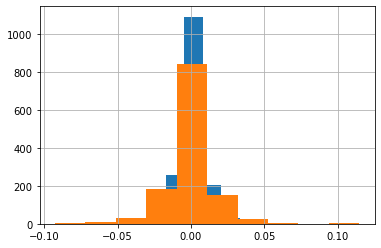

In [17]:
latest_valid = max([df_original[col].first_valid_index() for col in df_original])
df_original=df_original[df_original.index >= latest_valid].dropna()
df_original = df_original[df_original.index <= '2018-01-01']
merged_df=pd.merge(df_original,label_df,how = 'inner',left_index=True,right_index=True)
merged_df.groupby('label')['RAY'].hist()

In [18]:
max([df_original[col].first_valid_index() for col in df_original])

'2004-09-30'

In [19]:
merged_df.groupby('label')['RAY'].mean()


label
0    0.000674
1   -0.000177
Name: RAY, dtype: float64

In [20]:
merged_df.groupby('label')['RAY'].std()

label
0    0.009612
1    0.015726
Name: RAY, dtype: float64

In [21]:
train_label=pd.concat([df_train,label_df],axis=1)
display(train_label)

,RAY_feature0,RAY_feature1,QQQ_feature0,QQQ_feature1,QQQ_feature2,T10Y3M_feature0,T10Y3M_feature1,CL1_feature0,CL1_feature1,HG1_feature0,...,XAG_feature1,VNQ_feature0,VNQ_feature1,EURtoUSD_feature0,EURtoUSD_feature1,EEM_feature0,EEM_feature1,VIX_feature0,VIX_feature1,label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2006-11-20,0.885324,0.623950,1.459508,0.776773,0.695967,1.682670,0.682430,0.940578,1.529239,0.709452,...,1.420594,0.759136,0.762117,1.401735,1.595564,2.366925,0.623210,2.006362,0.722545,0
2006-11-21,0.964767,0.662617,1.361366,0.838592,0.541879,1.783971,0.709804,1.024910,1.405953,0.722956,...,1.496068,0.716507,0.852777,1.373349,1.662168,2.397174,0.631091,2.021739,0.704223,0
2006-11-22,1.141544,0.779493,1.408920,0.875384,0.565303,1.856760,0.699308,1.046798,1.382187,0.729090,...,1.395972,0.757292,0.886103,1.044487,1.326920,2.449411,0.632879,1.980979,0.673374,0
2006-11-23,1.018305,0.642769,1.496243,0.626023,0.937911,2.689592,1.147392,1.126029,1.336662,0.739020,...,1.350528,0.641696,1.059983,1.033326,1.437399,2.454318,0.654184,1.949406,0.659092,0
2006-11-24,0.873695,0.648454,1.223600,0.629167,0.742482,2.750116,1.268049,1.121907,1.264566,0.693209,...,1.395759,0.716777,1.083507,0.908714,1.202280,2.478807,0.658989,1.898560,0.616410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,0.919329,0.990031,1.068843,0.860211,0.595686,1.150398,1.891270,1.897113,0.724838,1.394268,...,1.257620,1.088082,0.561691,0.930235,1.254605,1.425323,1.244799,0.840293,1.350324,0
2017-12-26,0.861703,1.002830,1.081094,0.703996,1.012427,0.251600,1.823043,1.932922,0.763409,1.376117,...,1.306003,1.080449,0.490428,0.932207,1.240229,1.398429,1.250917,0.806610,1.292876,0
2017-12-27,0.957542,1.137638,0.836009,0.801175,0.766293,0.207976,1.834725,1.881135,0.696486,1.446887,...,1.403311,1.064722,0.460485,0.882476,1.278914,1.345210,1.230968,0.835064,1.246334,0


In [22]:
train_label.to_csv(root+'/2018_train_labels')